In [86]:
#Loading required packages
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from prettytable import PrettyTable

In [87]:
#Reading the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
feature= pd.read_csv('data/features.csv')
stores = pd.read_csv('data/stores.csv')

In [88]:
#Final Train dataset
train_merged = pd.merge(train,stores)
Train = pd.merge(train_merged,feature)

In [89]:
#Final Test dataset
test_merged = pd.merge(test,stores)
Test = pd.merge(test_merged,feature)

In [90]:
Train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [91]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [92]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [93]:
#Checking for missing values
Train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [94]:
#As there are many missing values instead of mean we use 0 to fill NA values
Train = Train.fillna(0)

In [95]:
sum(Train.isnull().sum())

0

In [96]:
#sorting data with respect to date
Train= Train.sort_values(by = 'Date')

In [97]:
#Checking for missing values
Test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [98]:
Test['CPI'] = Test['CPI'].fillna(Test['CPI'].mean())
Test['Unemployment'] = Test['Unemployment'].fillna(Test['Unemployment'].mean())
Test = Test.fillna(0)

In [99]:
sum(Test.isnull().sum())

0

In [100]:
#sorting data with respect to date
Test = Test.sort_values(by = 'Date')

In [101]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown4       115064 non-null float64
MarkDown5       115064 non-null float64
CPI             115064 non-null float64
Unemployment    115064 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [102]:
#Converting the trainset date to datetime format and Creating 4 new date variables(Day,Month,Year,Dayofweek)
Train['Date'] = pd.to_datetime(Train['Date'])

Train['Day_of_week']= Train['Date'].dt.dayofweek
Train['Day'] = Train['Date'].dt.day
Train['Month'] = Train['Date'].dt.month
Train['Year'] = Train['Date'].dt.year

In [103]:
#Converting the testset date to datetime format and Creating 4 new date variables(Day,Month,Year,Dayofweek)
Test['Date'] = pd.to_datetime(Test['Date'])

Test['Day_of_week']= Test['Date'].dt.dayofweek
Test['Day'] = Test['Date'].dt.day
Test['Month'] = Test['Date'].dt.month
Test['Year'] = Test['Date'].dt.year

[]

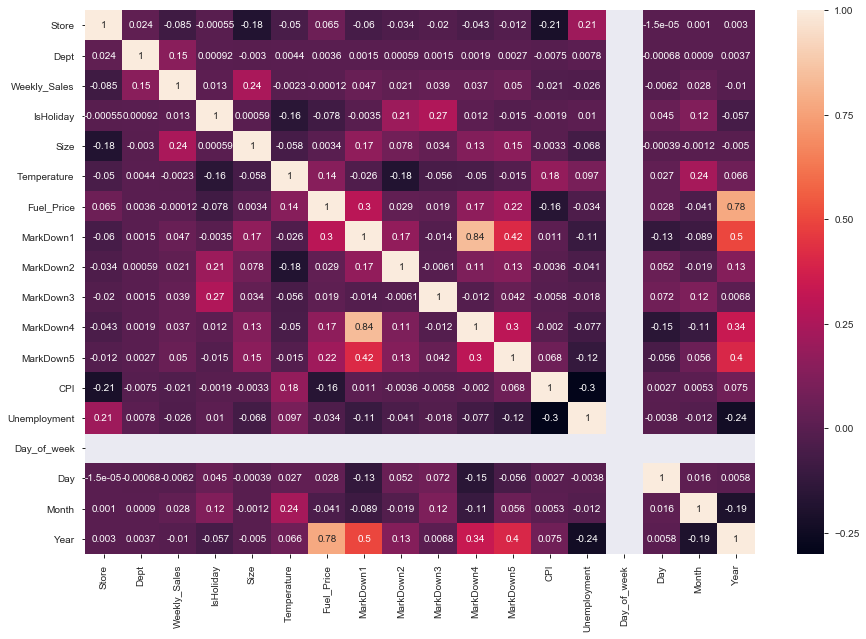

In [104]:
# Plotting correlation between all features
corr = Train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [105]:
#Getting dummy variables for categorical values in train data
dummies = pd.get_dummies(Train['Type'])
Train['IsHoliday'] = np.where(Train['IsHoliday'] == 'False',0,1)
Train = pd.concat([Train,dummies],axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [106]:
#Getting dummy variables for categorical values in test data
dummies = pd.get_dummies(Test['Type'])
Test['IsHoliday'] = np.where(Test['IsHoliday'] == 'False',0,1)
Test = pd.concat([Test,dummies],axis = 1)

In [107]:
#Dropping type variable
Train.drop('Type',axis = 1,inplace = True)
Test.drop('Type',axis = 1,inplace = True)

In [108]:
#Creating holiday variables in Train dataset
Train['super_bowl'] = np.where((Train['Date']==datetime(2010, 2, 12)) | (Train['Date']== datetime(2011,2,11)) | (Train['Date']== datetime(2012,2,10)) | (Train['Date']== datetime(2013,2,8)),1,0)
Train['labour_day'] = np.where((Train['Date']==datetime(2010, 9, 10)) | (Train['Date']== datetime(2011,9,9)) | (Train['Date']== datetime(2012,9,7)) | (Train['Date']== datetime(2013,9,6)),1,0)
Train['thanksgiving'] = np.where((Train['Date']==datetime(2010, 11, 26)) | (Train['Date']== datetime(2011,11,25)) | (Train['Date']== datetime(2012,11,23)) | (Train['Date']== datetime(2013,11,29)),1,0)
Train['christmas'] = np.where((Train['Date']==datetime(2010, 12, 31)) | (Train['Date']== datetime(2011,12,30)) | (Train['Date']== datetime(2012,12,28)) | (Train['Date']== datetime(2013,12,27)),1,0)

In [109]:
#Creating holiday variables in Test dataset
Test['super_bowl'] = np.where((Test['Date']==datetime(2010, 2, 12)) | (Test['Date']== datetime(2011,2,11)) | (Test['Date']== datetime(2012,2,10)) | (Test['Date']== datetime(2013,2,8)),1,0)
Test['labour_day'] = np.where((Test['Date']==datetime(2010, 9, 10)) | (Test['Date']== datetime(2011,9,9)) | (Test['Date']== datetime(2012,9,7)) | (Test['Date']== datetime(2013,9,6)),1,0)
Test['thanksgiving'] = np.where((Test['Date']==datetime(2010, 11, 26)) | (Test['Date']== datetime(2011,11,25)) | (Test['Date']== datetime(2012,11,23)) | (Test['Date']== datetime(2013,11,29)),1,0)
Test['christmas'] = np.where((Test['Date']==datetime(2010, 12, 31)) | (Test['Date']== datetime(2011,12,30)) | (Test['Date']== datetime(2012,12,28)) | (Test['Date']== datetime(2013,12,27)),1,0)

In [110]:
#Adding holidays to the IsHoliday variable based on the various holidays given
Train['IsHoliday'] = Train['IsHoliday']| Train ['super_bowl']|Train['labour_day']|Train['thanksgiving']|Train['christmas']
Test['IsHoliday'] = Test.IsHoliday|Test['super_bowl']|Test['labour_day']|Test['thanksgiving']|Test['christmas']

In [111]:
#Dropping the variables
lst = ['super_bowl','labour_day','thanksgiving','christmas']
Train.drop(lst,axis = 1,inplace = True)
Test.drop(lst,axis = 1,inplace = True)

In [112]:
#Seperating x and y variables
train_y = Train['Weekly_Sales']
train_X = Train.drop(['Weekly_Sales','Date'],axis = 1)

In [28]:
#train-test split
X_train,X_test,y_train,y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=123)

In [34]:
#BUILDING KNN REGRESSOR MODEL
knn_regressor = KNeighborsRegressor(n_neighbors = 10,n_jobs = -1)
knn_regressor.fit(train_X,train_y)
y_pred = knn_regressor.predict(X_test)

In [35]:
#Calculating necessary perfomance metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
accuracy_knn_regressor = knn_regressor.score(X_test,y_test)

10150.21312047821
270569021.54970026
16448.982386448723


In [36]:
#Accuracy
accuracy_knn_regressor

0.478108614427104

In [37]:
#BUILDING DECISION TREE REGRESSOR MODEL
decision_tree_regressor = DecisionTreeRegressor(random_state=456)
decision_tree_regressor.fit(X_train,y_train)
y_pred = decision_tree_regressor.predict(X_test)

In [38]:
#Calculating necessary perfomance metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
accuracy_decision_tree_regressor = decision_tree_regressor.score(X_test,y_test)

1866.9382661242503
23355825.85319606
4832.786551586575


In [39]:
#Accuracy
accuracy_decision_tree_regressor

0.9549497416743817

In [40]:
#BUILDING RANDOM FOREST REGRESSOR MODEL
randomforest_regressor = RandomForestRegressor(n_estimators = 400,max_depth = 15,n_jobs = -1)        
randomforest_regressor.fit(X_train,y_train)
y_pred = randomforest_regressor.predict(X_test)

In [41]:
#Calculating necessary perfomance metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
accuracy_randomforest_regressor = randomforest_regressor.score(X_test,y_test)

1964.3851561349747
19165094.17430029
4377.795583886974


In [42]:
#Accuracy
accuracy_randomforest_regressor

0.9630331015133478

In [30]:
#BUILDING XGB REGRESSOR MODEL
xgb_regressor = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xgb_regressor.fit(X_train,y_train)
y_pred = xgb_regressor.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:53:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
#Calculating necessary perfomance metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
accuracy_xgb_regressor = xgb_regressor.score(X_test,y_test)

2035.0380049245673
14004827.816331476
3742.3024752592455


In [32]:
#Accuracy
accuracy_xgb_regressor

0.9729865638279196

In [48]:
Final_Models_Metrics = PrettyTable()
Final_Models_Metrics.field_names = ["Model", "MAE", "RMSE", "Accuracy"]
Final_Models_Metrics.add_row(["KNNRegressor", 10150, 16449, 47.90])
Final_Models_Metrics.add_row(["DecisionTreeRegressor", 1866, 4832, 95.50])
Final_Models_Metrics.add_row(["RandomForestRegressor", 1964, 4378, 96.30])
Final_Models_Metrics.add_row(["XGBRegressor", 2035, 3742,97.30 ])
print(Final_Models_Metrics)

+-----------------------+-------+-------+----------+
|         Model         |  MAE  |  RMSE | Accuracy |
+-----------------------+-------+-------+----------+
|      KNNRegressor     | 10150 | 16449 |   47.9   |
| DecisionTreeRegressor |  1866 |  4832 |   95.5   |
| RandomForestRegressor |  1964 |  4378 |   96.3   |
|      XGBRegressor     |  2035 |  3742 |   97.3   |
+-----------------------+-------+-------+----------+


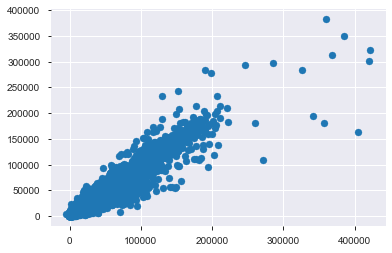

In [118]:
#Scatterplot for XGBRegressor Model
plt.scatter(y_test,y_pred)
plt.show()

# From the above 4 models, and by looking at the above graph, i would consider using XGBRegressor model as it gives me the best accuracy.

In [113]:
#Using above models to preddict on test dataset
#I did'nt use KNN model as it did'nt give the best accuracy
test_date = Test['Date']
Test = Test.drop(['Date'],axis = 1)
xgboost_pred = xgb_regressor.predict(Test)
randomforest_pred = randomforest_regressor.predict(Test)
decisiontree_pred = decision_tree_regressor.predict(Test)
Test['Date'] = test_date

In [114]:
#Final submissionof weekly predicted sales
Final_Submission = pd.DataFrame({
    "Store_Date": Test.Store.astype(str)+ '_' +Test.Dept.astype(str)+ '_' +Test.Date.astype(str),
        "Weekly_Sales": xgboost_pred
    })

In [117]:
#Exporting to csv
Final_Submission.to_csv('weekly_predicted_sales.csv')

## I've done my final submission at the store level, department level and weekly level. But they might not be in order. Please consider this submission i will try to improve myself when i gain more business knowledge.